In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes

In [15]:
df = pd.read_csv(r'C:\Users\bless\OneDrive\Desktop\week-0\EDA\data-set\benin-malanville.csv')

In [16]:
display(df.shape)

(525600, 19)

In [17]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

None

In [18]:
display(df.head())

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [19]:
display(df.describe(include=[np.number]))

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [20]:
missing_report = df.isna().sum().sort_values(ascending=False)
missing_percentage = (df.isna().mean() * 100).sort_values(ascending=False)
missing_df = pd.concat([missing_report, missing_percentage], axis=1)
missing_df.columns = ['Missing Count', 'Missing Percentage']
display(missing_report)
display(missing_df[missing_df['Missing Percentage'] > 5])

Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

,Missing Count,Missing Percentage
Comments,525600,100.0


In [21]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

def detect_outliers(df, columns, threshold=3):
    df = df.copy()
    df['Outlier_Flag'] = False  

    for col in columns:
        if col in df.columns:
            z_scores = np.abs(stats.zscore(df[col], nan_policy='omit'))
            df['Outlier_Flag'] |= (z_scores > threshold)
    
    total_outliers = df['Outlier_Flag'].sum()
    percent = total_outliers / len(df) * 100
    print(f"Detected {total_outliers} outlier rows ({percent:.2f}% of total).")
    
    return df
df = detect_outliers(df, key_columns)


Detected 7740 outlier rows (1.47% of total).


In [22]:
df.isna().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
Outlier_Flag          0
dtype: int64

In [23]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in key_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)


In [25]:
df.to_csv('../data/benin-malanville_clean.csv', index=False)


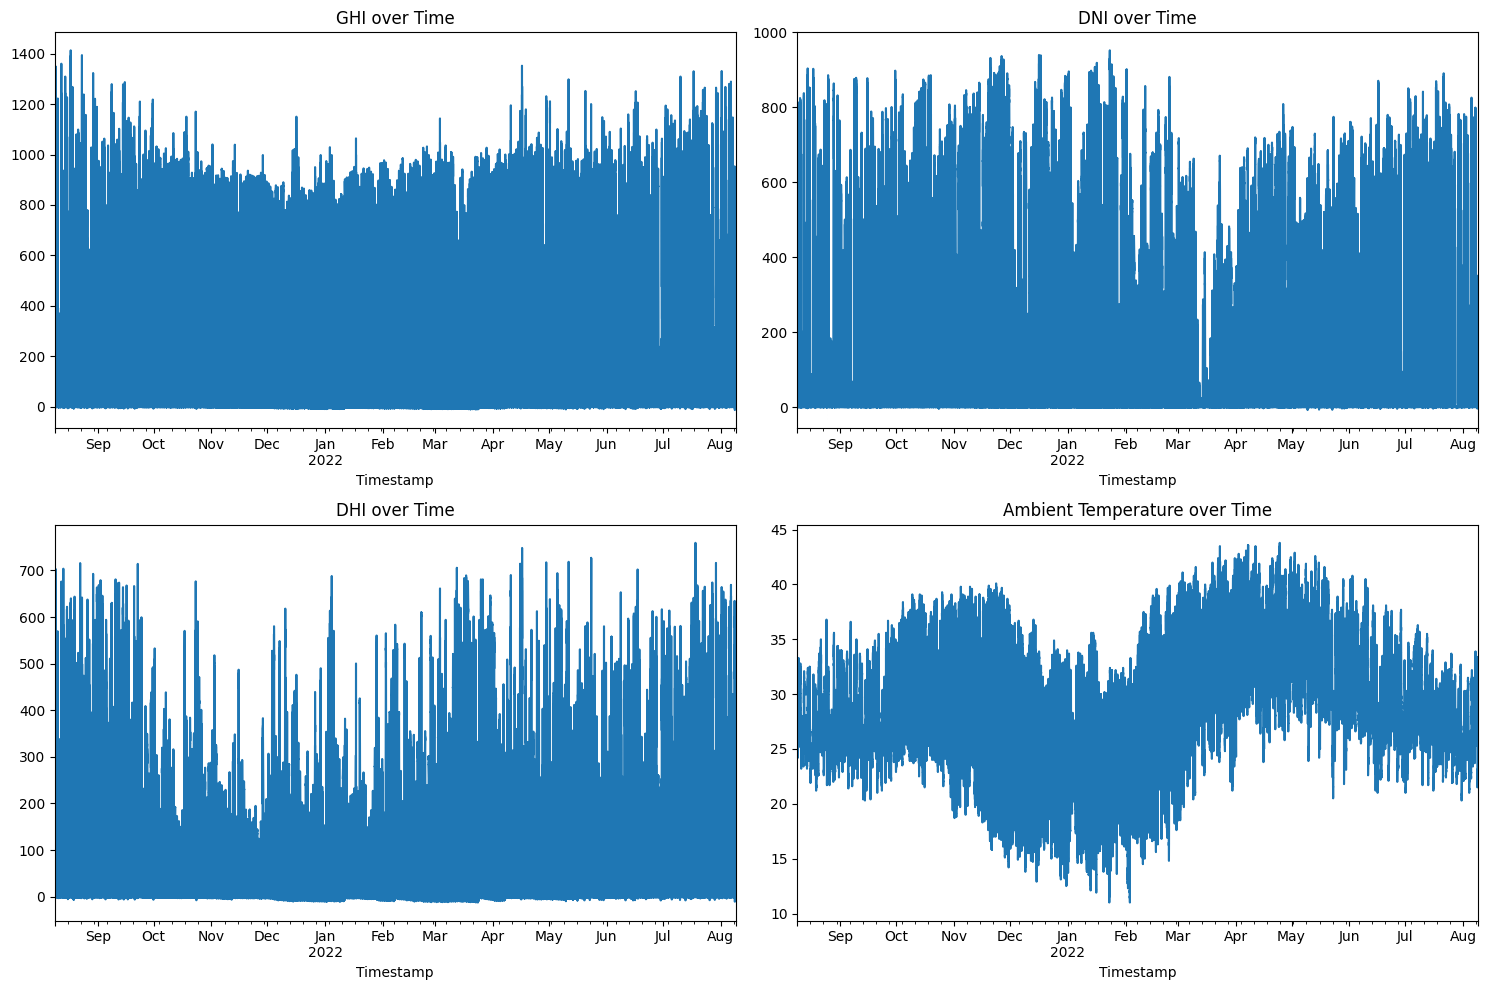

C:\Users\bless\AppData\Local\Temp\ipykernel_7272\2784002370.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = ts_df.resample('M').mean()


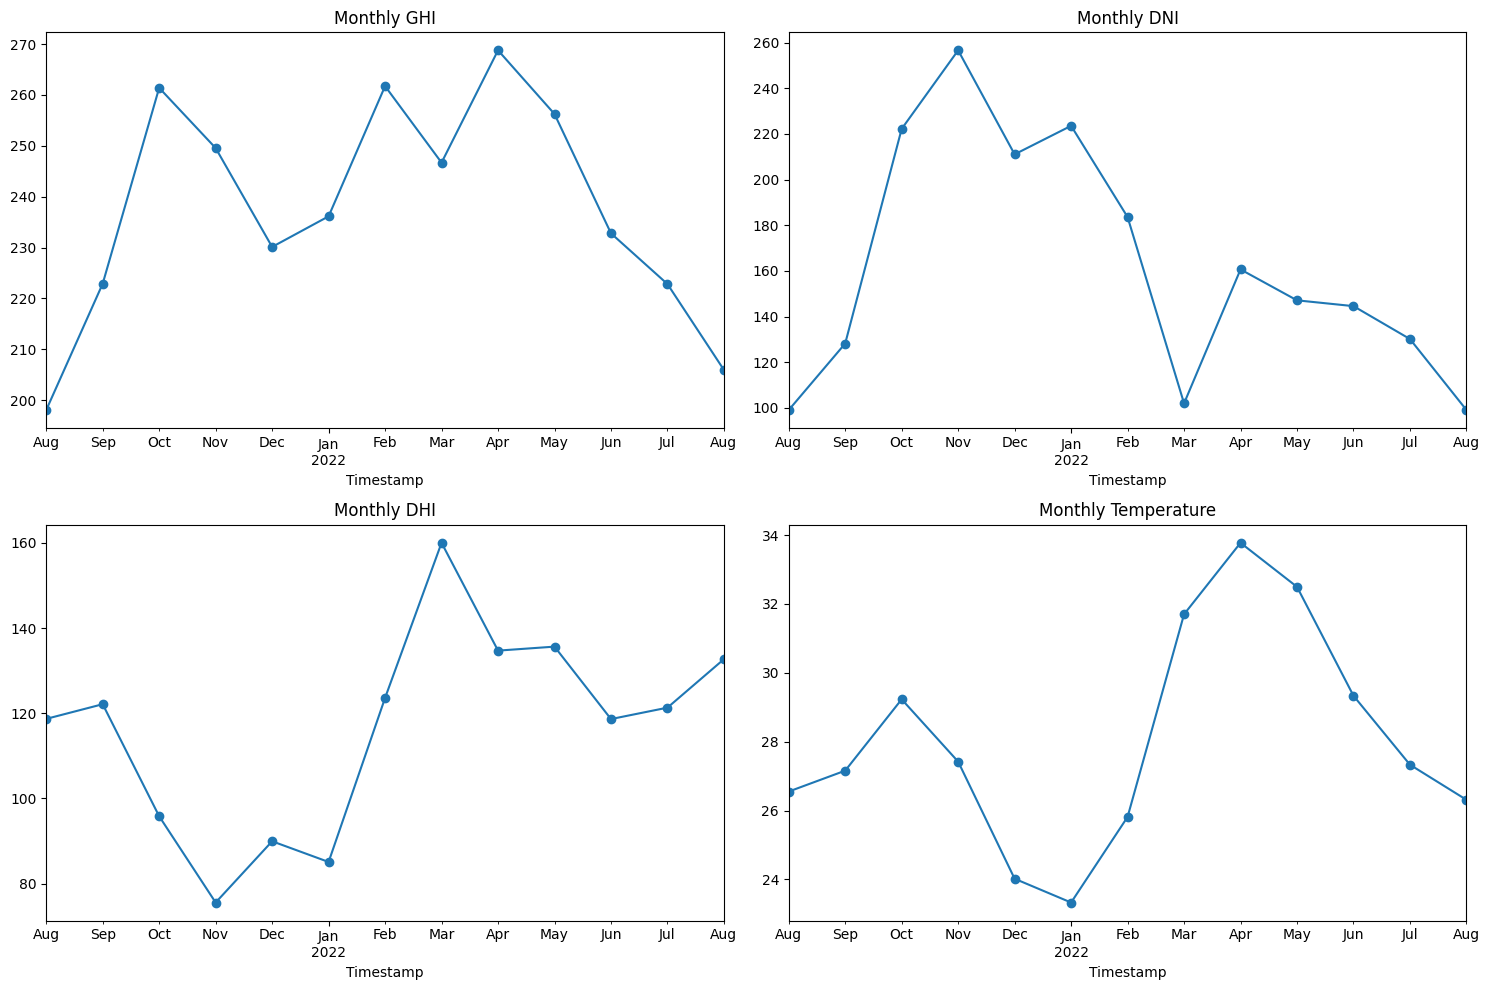

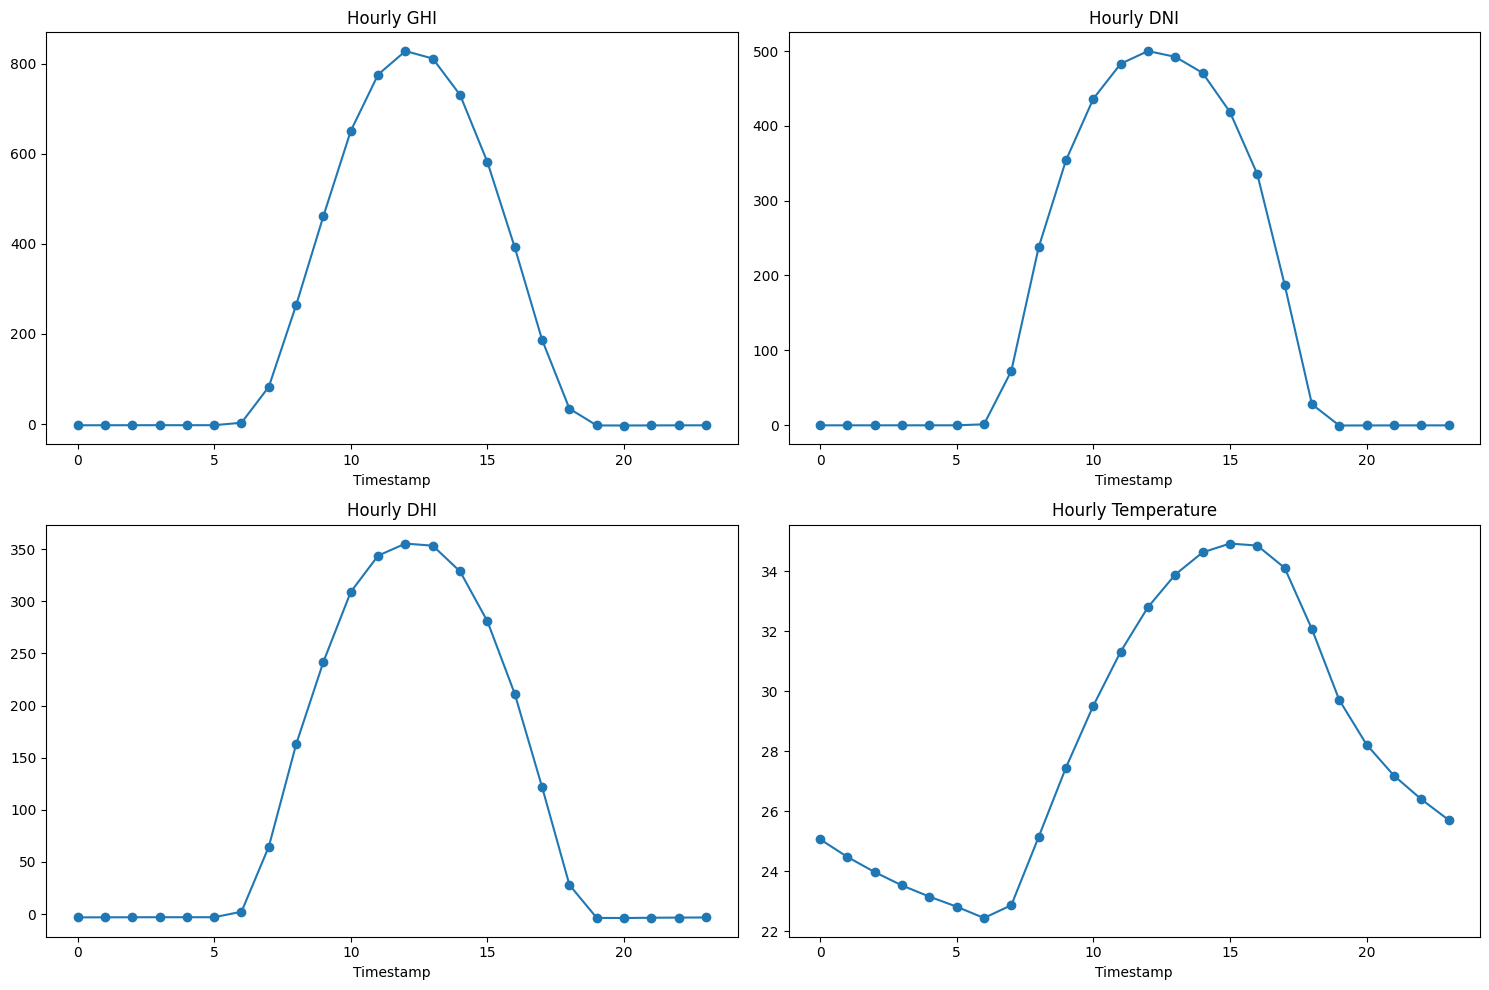

In [26]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
ts_df = df.set_index('Timestamp')


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ts_df['GHI'].plot(ax=axes[0,0], title='GHI over Time')
ts_df['DNI'].plot(ax=axes[0,1], title='DNI over Time')
ts_df['DHI'].plot(ax=axes[1,0], title='DHI over Time')
ts_df['Tamb'].plot(ax=axes[1,1], title='Ambient Temperature over Time')
plt.tight_layout()
plt.show()


monthly_avg = ts_df.resample('M').mean()
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
monthly_avg['GHI'].plot(ax=axes[0,0], title='Monthly GHI', marker='o')
monthly_avg['DNI'].plot(ax=axes[0,1], title='Monthly DNI', marker='o')
monthly_avg['DHI'].plot(ax=axes[1,0], title='Monthly DHI', marker='o')
monthly_avg['Tamb'].plot(ax=axes[1,1], title='Monthly Temperature', marker='o')
plt.tight_layout()
plt.show()


hourly_avg = ts_df.groupby(ts_df.index.hour).mean()
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
hourly_avg['GHI'].plot(ax=axes[0,0], title='Hourly GHI', marker='o')
hourly_avg['DNI'].plot(ax=axes[0,1], title='Hourly DNI', marker='o')
hourly_avg['DHI'].plot(ax=axes[1,0], title='Hourly DHI', marker='o')
hourly_avg['Tamb'].plot(ax=axes[1,1], title='Hourly Temperature', marker='o')
plt.tight_layout()
plt.show()

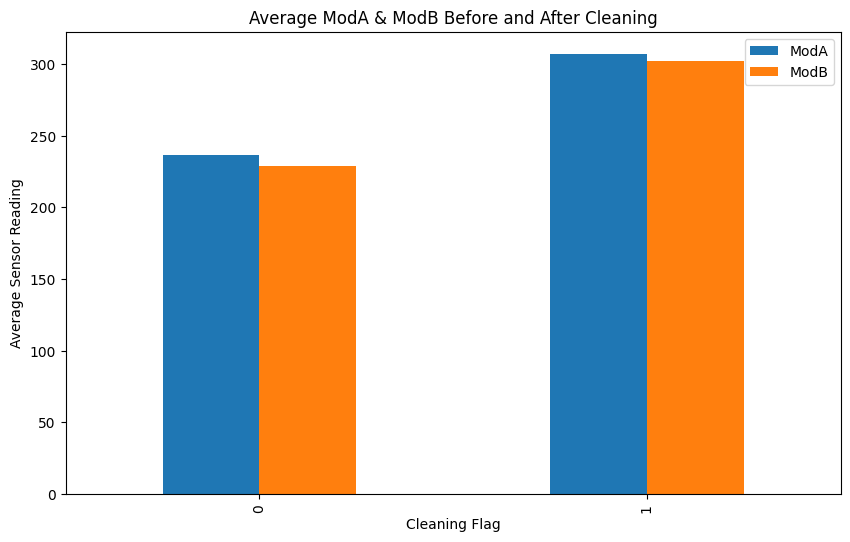

In [27]:
cleaning_group = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

cleaning_group.plot(kind='bar', figsize=(10, 6))
plt.title('Average ModA & ModB Before and After Cleaning')
plt.xlabel('Cleaning Flag')
plt.ylabel('Average Sensor Reading')
plt.show()


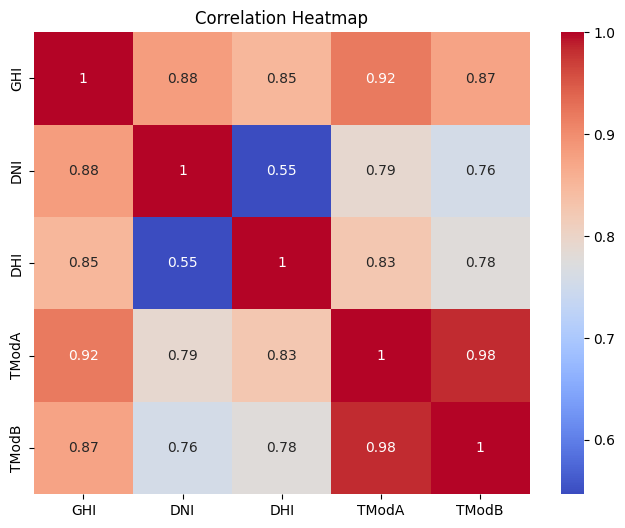

In [28]:

corr_vars = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


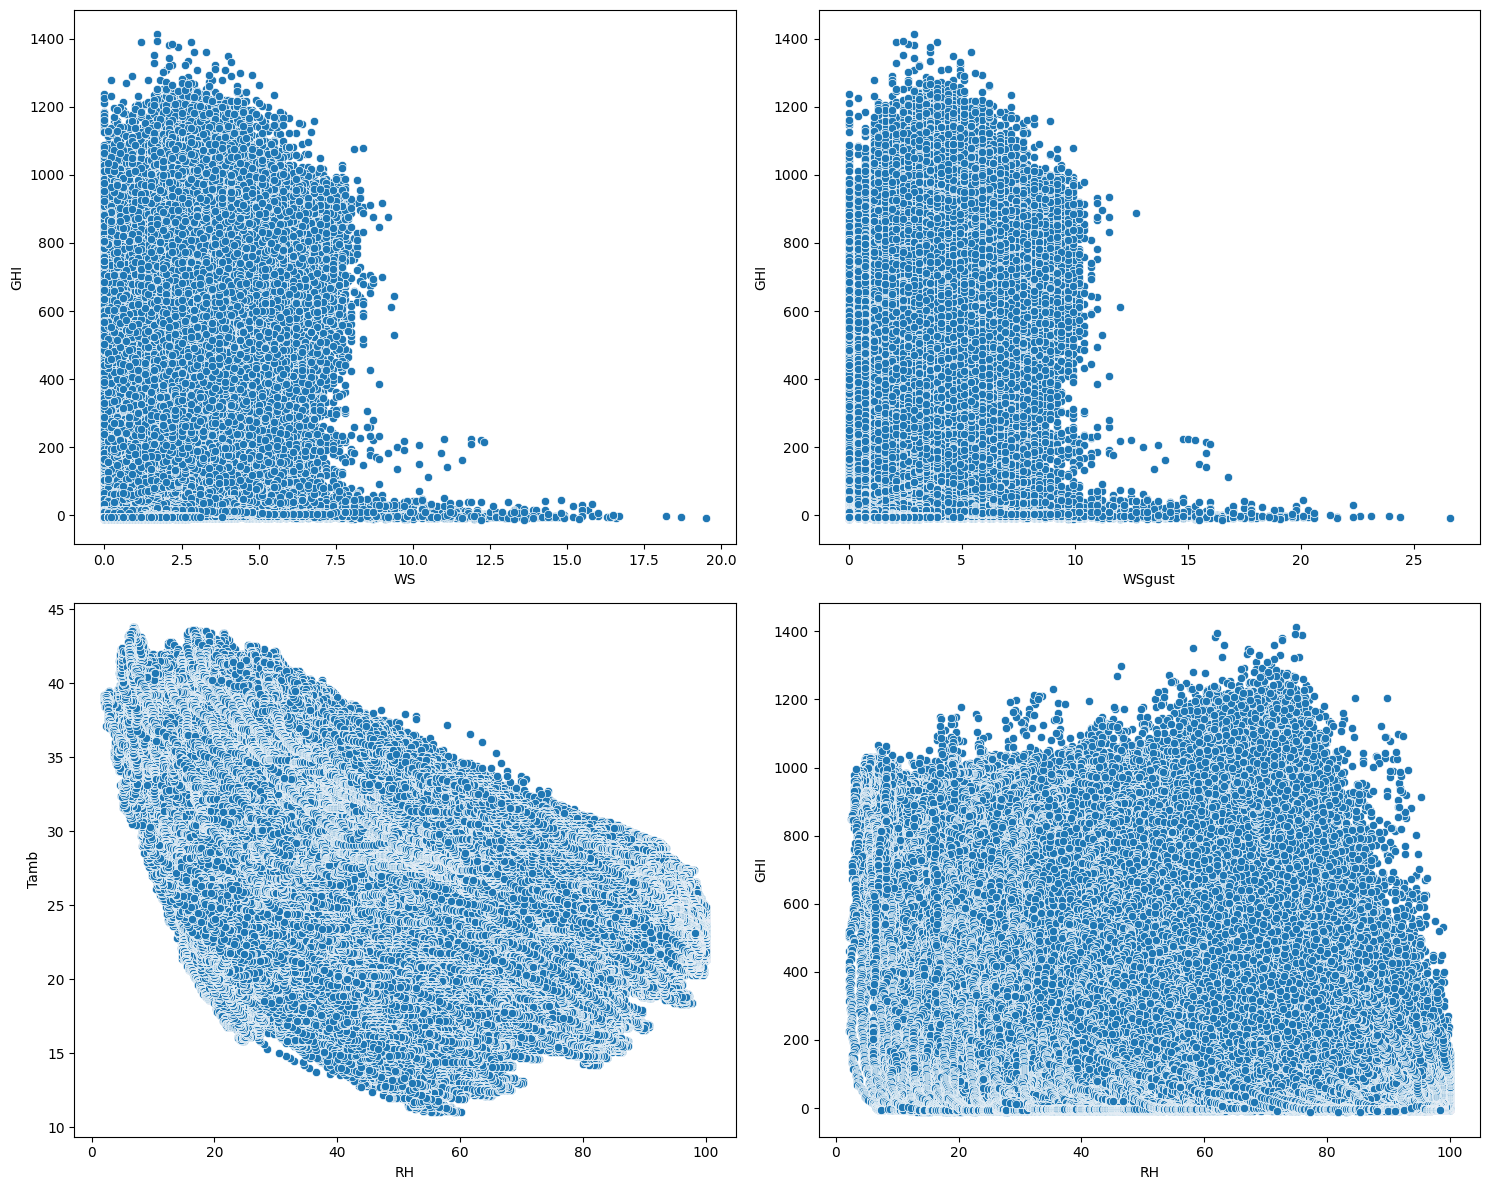

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.scatterplot(data=df, x='WS', y='GHI', ax=axes[0, 0])
sns.scatterplot(data=df, x='WSgust', y='GHI', ax=axes[0, 1])
sns.scatterplot(data=df, x='RH', y='Tamb', ax=axes[1, 0])
sns.scatterplot(data=df, x='RH', y='GHI', ax=axes[1, 1])
plt.tight_layout()
plt.show()

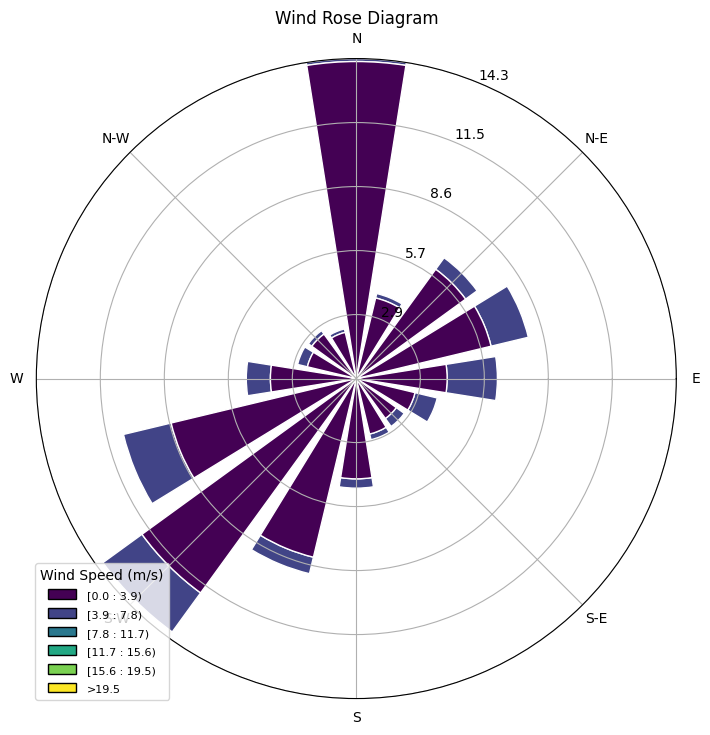

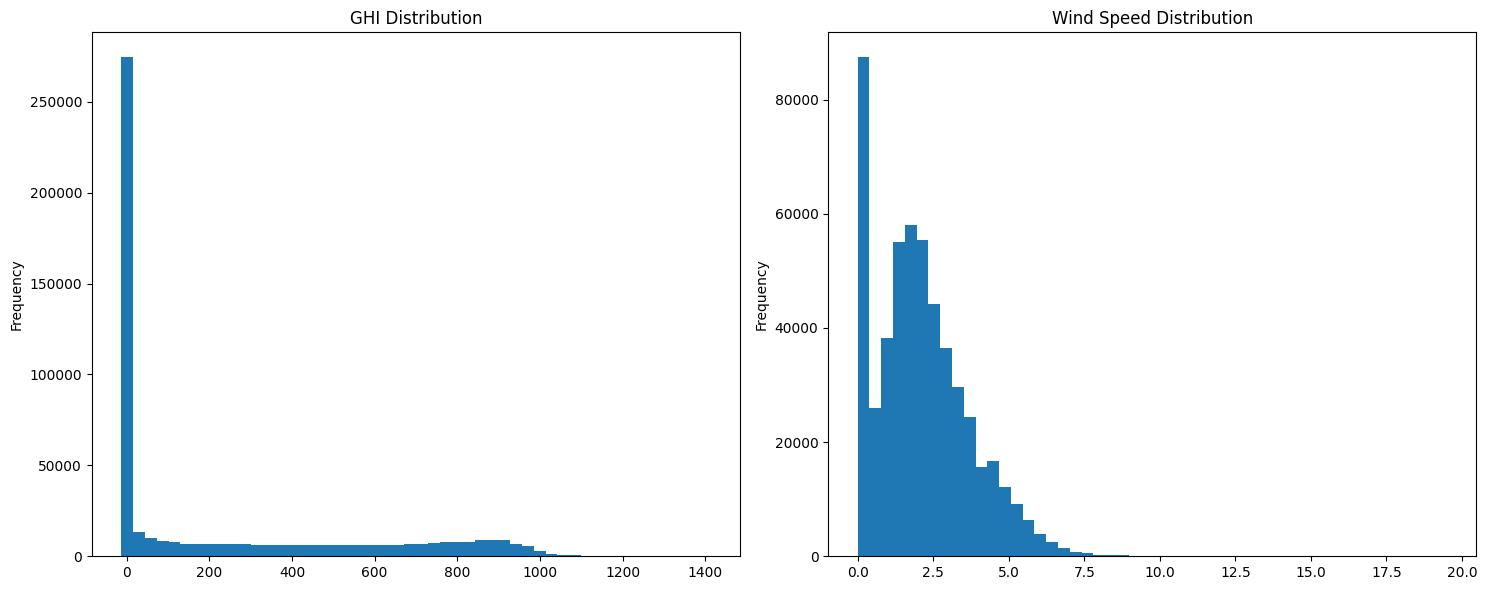

In [30]:
fig = plt.figure(figsize=(12, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose Diagram')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
df['GHI'].plot(kind='hist', bins=50, ax=axes[0], title='GHI Distribution')
df['WS'].plot(kind='hist', bins=50, ax=axes[1], title='Wind Speed Distribution')
plt.tight_layout()
plt.show()

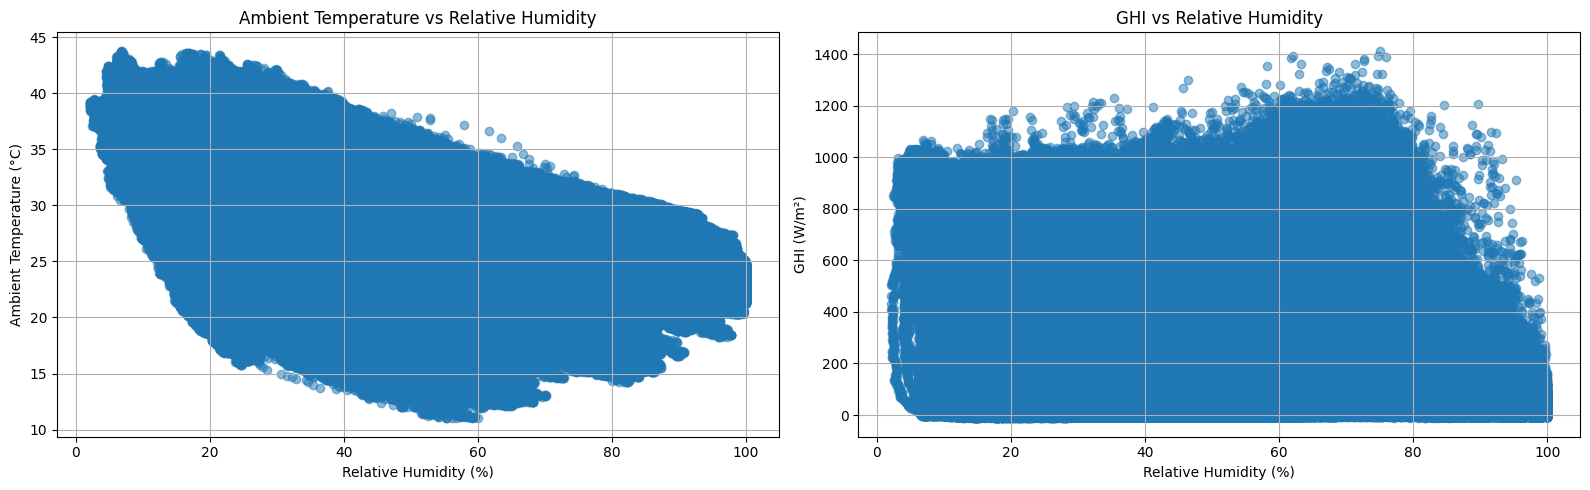

In [31]:
plt.figure(figsize=(16, 5))  
plt.subplot(1, 2, 1)  
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.title('Ambient Temperature vs Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)


plt.subplot(1, 2, 2) 
plt.scatter(df['RH'], df['GHI'], alpha=0.5)
plt.title('GHI vs Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)


plt.tight_layout()
plt.show()

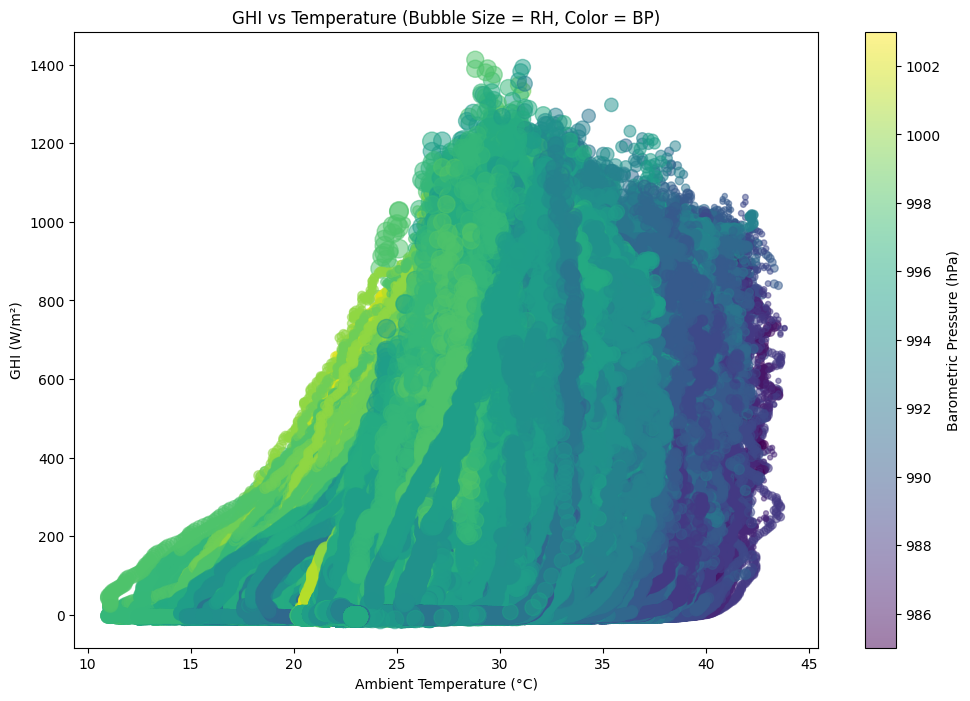

In [32]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*2, alpha=0.5, 
                     c=df['BP'], cmap='viridis')
plt.colorbar(scatter, label='Barometric Pressure (hPa)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (Bubble Size = RH, Color = BP)')
plt.show()